# 02. Connect datalab
- datalab은 Google Cloud에서 서비스하는 Jupyter notebook이라고 보면 됩니다
- 최근 20170818 버전부터 python2, python3 커널을 사용할 수 있습니다 (기존에는 python2만 해당)
- datalab은 Google Cloud Storage / BigQuery 등에서 IO 속도가 매우 빠릅니다
- [datalab install](https://cloud.google.com/datalab/docs/quickstarts)
- datalab connect [datalab instance 명]

<img src="../images/007_connect_datalab.png" width="700" height="700">
- Google Datalab의 모습

In [2]:
import google.datalab.bigquery as bq

In [3]:
# Query 생성
query_string = '''
              #standardSQL
              SELECT corpus AS title, COUNT(*) AS unique_words
              FROM `publicdata.samples.shakespeare`
              GROUP BY title
              ORDER BY unique_words DESC
              LIMIT 10
              '''

In [4]:
query = bq.Query(query_string)

In [5]:
output_options = bq.QueryOutput.table(use_cache=True)
result = query.execute(output_options=output_options).result() # query 실행
result

title,unique_words
hamlet,5318
kinghenryv,5104
cymbeline,4875
troilusandcressida,4795
kinglear,4784
kingrichardiii,4713
2kinghenryvi,4683
coriolanus,4653
2kinghenryiv,4605
antonyandcleopatra,4582


## pandas dataframe으로 변환

In [6]:
pandas_df = result.to_dataframe()

In [7]:
pandas_df

,title,unique_words
0,hamlet,5318
1,kinghenryv,5104
2,cymbeline,4875
3,troilusandcressida,4795
4,kinglear,4784
5,kingrichardiii,4713
6,2kinghenryvi,4683
7,coriolanus,4653
8,2kinghenryiv,4605
9,antonyandcleopatra,4582


In [8]:
sample_dataset = bq.Dataset('bigquery-public-data.samples')

In [9]:
# dataset이 존재하는지 유무
sample_dataset.exists() 

True

### %bq magic command를 이용한 project sample 확인

In [10]:
%bq datasets list --project cloud-datalab-samples

### %%bq query를 사용해 바로 query문을 날림

In [12]:
%%bq query
#standardSQL
SELECT corpus AS title, COUNT(*) AS unique_words
FROM `publicdata.samples.shakespeare`
GROUP BY title
ORDER BY unique_words DESC
LIMIT 10

title,unique_words
hamlet,5318
kinghenryv,5104
cymbeline,4875
troilusandcressida,4795
kinglear,4784
kingrichardiii,4713
2kinghenryvi,4683
coriolanus,4653
2kinghenryiv,4605
antonyandcleopatra,4582


### 매직커맨드를 활용해 pandas data frame 생성

In [17]:
%%bq query -n requests
SELECT timestamp, latency, endpoint
FROM `cloud-datalab-samples.httplogs.logs_20140615`
WHERE endpoint = 'Popular' OR endpoint = 'Recent'

In [18]:
df = requests.execute(output_options=bq.QueryOutput.dataframe()).result()
len(df)

8392

In [19]:
df.head()

,timestamp,latency,endpoint
0,2014-06-15 14:41:43.465275,256,Recent
1,2014-06-15 17:25:47.865026,256,Recent
2,2014-06-15 19:40:43.414446,256,Recent
3,2014-06-16 01:38:26.398083,256,Recent
4,2014-06-16 03:32:55.519498,256,Recent


### google chart api를 활용해 바로 chart 그리기 가능

In [13]:
%%bq query --name data
WITH quantiles AS (
  SELECT APPROX_QUANTILES(LOG10(latency), 50) AS timearray
  FROM `cloud-datalab-samples.httplogs.logs_20140615`
  WHERE latency <> 0
)
select row_number() over(order by time) as percentile, time from quantiles cross join unnest(quantiles.timearray) as time
order by percentile

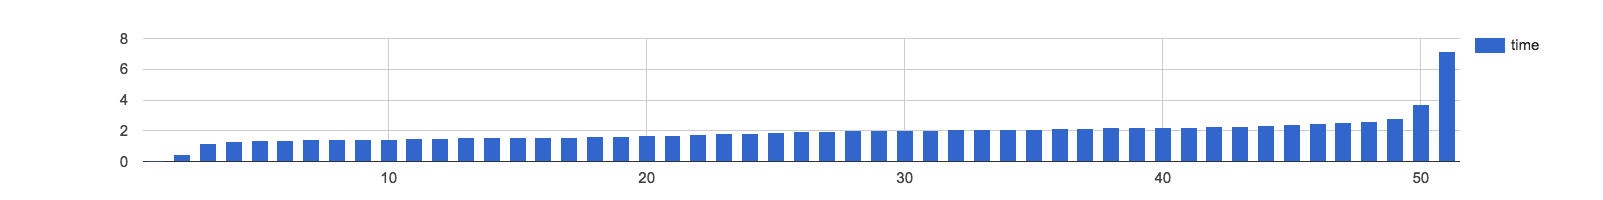

In [14]:
%chart columns --data data --fields percentile,time